In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder

In [2]:
#Read the File 
data=pd.read_csv('DS/data_assignment.csv')

In [3]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
data.shape

(8523, 12)

In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Check for duplicated rows
data.duplicated().sum()

0

In [8]:
#check for nan values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [10]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [11]:
data['Item_Identifier'].apply(lambda x : str(x)[:2]).value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [12]:
data['Item_Identifier_code'] = data['Item_Identifier'].apply(lambda x : str(x)[:2])

In [13]:
data[['Item_Identifier_code','Item_Type' ]]

,Item_Identifier_code,Item_Type
0,FD,Dairy
1,DR,Soft Drinks
2,FD,Meat
3,FD,Fruits and Vegetables
4,NC,Household
...,...,...
8518,FD,Snack Foods
8519,FD,Baking Goods
8520,NC,Health and Hygiene
8521,FD,Snack Foods


In [14]:
data.groupby('Item_Identifier_code')['Item_Type'].value_counts()

Item_Identifier_code  Item_Type            
DR                    Soft Drinks               445
                      Hard Drinks               214
                      Dairy                     140
FD                    Fruits and Vegetables    1232
                      Snack Foods              1200
                      Frozen Foods              856
                      Canned                    649
                      Baking Goods              648
                      Dairy                     542
                      Meat                      425
                      Breads                    251
                      Starchy Foods             148
                      Breakfast                 110
                      Seafood                    64
NC                    Household                 910
                      Health and Hygiene        520
                      Others                    169
Name: Item_Type, dtype: int64

In [15]:
data.groupby(['Item_Identifier','Item_Type'])['Item_Weight'].mean().reset_index().head(25)

,Item_Identifier,Item_Type,Item_Weight
0,DRA12,Soft Drinks,11.600
1,DRA24,Soft Drinks,19.350
2,DRA59,Soft Drinks,8.270
3,DRB01,Soft Drinks,7.390
4,DRB13,Soft Drinks,6.115
5,DRB24,Soft Drinks,8.785
6,DRB25,Soft Drinks,12.300
7,DRB48,Soft Drinks,16.750
8,DRC01,Soft Drinks,5.920
9,DRC12,Soft Drinks,17.850


<AxesSubplot:>

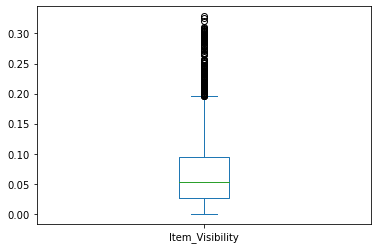

In [16]:
data.drop(columns=['Item_Weight','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']).plot(kind = 'box')

In [17]:
data['Item_Weight'] = data.groupby(['Item_Identifier_code','Item_Type']).Item_Weight.transform(lambda x: x.fillna(x.mean())
                                                                   )

In [18]:
data['Item_Weight'].isna().sum()

0

In [19]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_code
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [20]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular', 'low fat' : 'Low Fat'}, inplace = True)

In [22]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:ylabel='Frequency'>

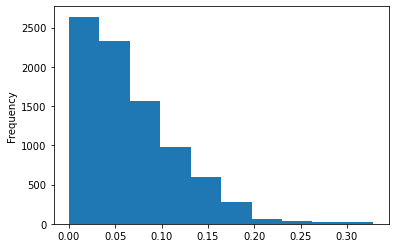

In [23]:
data['Item_Visibility'].plot(kind = 'hist')

In [24]:
data[data['Item_Visibility']==0.0].Item_Type.value_counts()

Fruits and Vegetables    87
Snack Foods              68
Household                51
Frozen Foods             51
Baking Goods             45
Dairy                    38
Soft Drinks              34
Health and Hygiene       33
Canned                   33
Meat                     20
Breads                   17
Hard Drinks              17
Starchy Foods            15
Others                   10
Seafood                   4
Breakfast                 3
Name: Item_Type, dtype: int64

In [25]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [26]:
data['Outlet_Age'] = 2023 - data['Outlet_Establishment_Year']

In [27]:
del  data['Outlet_Establishment_Year']

In [28]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_code,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,24
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,14
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,24
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,FD,25
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,FD,36
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,NaN,Tier 2,Supermarket Type1,549.2850,FD,21
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,NC,19
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,FD,14


In [29]:
data['Outlet_Size'].isna().sum()

2410

In [30]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [31]:
data['Outlet_Size'] = data.groupby(['Outlet_Type']).Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))

In [32]:
data.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small          1083
Supermarket Type1  Small          3715
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [33]:
data.isna().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Item_Identifier_code    0
Outlet_Age              0
dtype: int64

In [34]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [36]:
data_cat = data.select_dtypes(exclude = np.number)

/* 1)Drop the Item identifier
2)convert all other categorical data to one hot
3)concat the numerical data and one hoted categorical data
4)split train and test
5)build the model on train
6)predict the train
7)find the train error
8)predict on test
9)find the test error
10)compare the train and test error */


In [37]:
data_cat = data_cat.drop(columns = 'Item_Identifier')

In [38]:
data_cat.head(5)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_code
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD
3,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store,FD
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,NC


In [40]:
data_encoded = pd.get_dummies(data_cat, columns = ['Item_Identifier_code', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', "Outlet_Type"], drop_first=True)

In [41]:
data_encoded.head(5)

,Item_Identifier_code_FD,Item_Identifier_code_NC,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [42]:
data_num = data.select_dtypes(include = np.number)

In [43]:
data_num.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
0,9.30,0.016047,249.8092,3735.1380,24
1,5.92,0.019278,48.2692,443.4228,14
2,17.50,0.016760,141.6180,2097.2700,24
3,19.20,0.000000,182.0950,732.3800,25
4,8.93,0.000000,53.8614,994.7052,36


In [44]:
data_num = data_num.reset_index().drop(columns = 'index')
data_encoded = data_encoded.reset_index().drop(columns = 'index')

In [45]:
data_ = pd.concat([data_num,data_encoded], axis = 1)

In [46]:
data_

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier_code_FD,Item_Identifier_code_NC,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,24,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,14,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,24,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,25,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,36,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,36,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,21,1,0,1,0,0,...,1,0,0,0,1,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,19,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,14,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
#Modelling

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
#spilt data into test and train

In [48]:
X = data_.drop(columns = 'Item_Outlet_Sales')

In [49]:
y = data_['Item_Outlet_Sales']

In [50]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state= 1)

In [51]:
train_X.shape, test_X.shape

((5966, 38), (2557, 38))

In [ ]:
#scaling

In [52]:
scale = StandardScaler()

In [53]:
scale.fit(train_X)

StandardScaler()

In [54]:
train_X_scaled = pd.DataFrame(scale.transform(train_X), columns=train_X.columns)
test_X_scaled = pd.DataFrame(scale.transform(test_X), columns=test_X.columns)

In [55]:
train_X_scaled.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier_code_FD,Item_Identifier_code_NC,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.069293,-0.157371,-0.501420,1.524075,-1.592625,2.067602,-0.740814,-0.178889,-0.109746,-0.285624,...,-0.348466,-0.345434,-0.350278,1.422072,-1.120145,-0.69682,1.232218,-1.379040,-0.351483,2.820985
1,-0.411261,-0.649379,-0.403358,1.286163,-1.592625,2.067602,-0.740814,-0.178889,-0.109746,-0.285624,...,-0.348466,-0.345434,-0.350278,-0.703199,-1.120145,-0.69682,1.232218,0.725142,-0.351483,-0.354486
2,-1.079508,-0.169367,-0.447533,-0.022352,-1.592625,-0.483652,-0.740814,-0.178889,-0.109746,-0.285624,...,-0.348466,-0.345434,-0.350278,-0.703199,0.892742,-0.69682,1.232218,-1.379040,-0.351483,-0.354486
3,1.294653,-0.997861,-0.570387,1.286163,-1.592625,-0.483652,-0.740814,-0.178889,-0.109746,-0.285624,...,-0.348466,-0.345434,-0.350278,-0.703199,-1.120145,-0.69682,1.232218,0.725142,-0.351483,-0.354486
4,1.847604,-0.527430,0.150636,-0.141307,-1.592625,2.067602,-0.740814,-0.178889,-0.109746,-0.285624,...,-0.348466,-0.345434,2.854874,1.422072,-1.120145,-0.69682,-0.811544,0.725142,-0.351483,-0.354486


In [56]:
test_X_scaled.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier_code_FD,Item_Identifier_code_NC,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.153456,-0.218030,-1.689025,-0.498175,-1.592625,2.067602,-0.740814,-0.178889,-0.109746,-0.285624,...,2.869720,-0.345434,-0.350278,-0.703199,0.892742,1.435091,-0.811544,0.725142,-0.351483,-0.354486
1,-0.081843,0.152864,-0.866191,-1.330866,0.627894,-0.483652,1.349866,-0.178889,-0.109746,3.501111,...,-0.348466,-0.345434,-0.350278,1.422072,-1.120145,-0.696820,1.232218,-1.379040,2.845086,-0.354486
2,0.126334,1.133782,-0.480376,1.524075,-1.592625,2.067602,-0.740814,-0.178889,-0.109746,-0.285624,...,-0.348466,-0.345434,-0.350278,1.422072,-1.120145,-0.696820,1.232218,-1.379040,-0.351483,2.820985
3,-0.081843,0.146980,-0.879141,0.096604,0.627894,-0.483652,1.349866,-0.178889,-0.109746,3.501111,...,-0.348466,2.894910,-0.350278,-0.703199,0.892742,-0.696820,-0.811544,0.725142,-0.351483,-0.354486
4,0.706407,-1.157532,-1.628151,1.286163,0.627894,-0.483652,1.349866,-0.178889,-0.109746,-0.285624,...,-0.348466,-0.345434,-0.350278,-0.703199,-1.120145,-0.696820,1.232218,0.725142,-0.351483,-0.354486


In [ ]:
#model

In [57]:
reg = LinearRegression()

In [58]:
reg.fit(train_X_scaled, train_y)

LinearRegression()

In [59]:
reg.intercept_

2190.2349278667766

In [60]:
reg.coef_

array([ 9.59681793e+00, -2.22255803e+01,  9.67730524e+02, -1.85591259e+15,
        4.36686849e+01, -2.70217556e+14,  1.35733476e+01,  9.47533991e+00,
        2.93543463e+00,  4.99118379e+00, -2.90912473e+01, -7.13868297e+00,
        1.09098741e+01,  1.12610288e+01,  1.63944375e+14,  2.14944406e+14,
        1.06081310e+00,  9.71782250e+13,  2.93414582e+01,  9.21144633e+00,
       -1.61511463e+00,  3.80100097e+00,  1.80455133e+15, -3.00955656e+13,
       -1.51919443e+15,  1.05932715e+15,  5.57730252e+14,  1.76545237e+14,
        3.13032810e+14,  8.46926366e+14,  1.61958021e+15, -2.57793848e+14,
        1.16267376e+15,  2.96952313e+14,  7.75279082e+14, -4.46289439e+14,
        1.66301205e+15,  1.25562101e+15])

In [61]:
train_predict = reg.predict(train_X_scaled)

In [62]:
train_predict

array([ 3243.59642327,  1871.08058903,   -98.04441097, ...,
        2374.08058903, -1190.79441097,  4510.59642327])

In [63]:
test_predict = reg.predict(test_X_scaled)

In [64]:
test_predict

array([ 548.58058903, 1208.33058903, 3199.59642327, ..., 3001.08058903,
        727.58058903, 1770.58058903])

In [65]:
#error metrics

In [66]:
def returnError(actual,pred):
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    mae = mean_absolute_error(actual,pred)
    mape = mean_absolute_percentage_error(actual,pred)
    r2 = r2_score(actual,pred)
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("MAPE = ", mape)
    print("R2 Score = ", r2)

In [67]:
print("TRAIN ERROR")
returnError(train_y, reg.predict(train_X_scaled))

TRAIN ERROR
MSE =  1276890.7579325049
RMSE =  1129.9959105822043
MAE =  834.3143533975893
MAPE =  1.0235489900035286
R2 Score =  0.5616242424964131


In [68]:
print("TEST ERROR")
returnError(test_y, reg.predict(test_X_scaled))

TEST ERROR
MSE =  1262235.3003599278
RMSE =  1123.4924567436703
MAE =  836.883471892917
MAPE =  1.0793592698808643
R2 Score =  0.5660779771405287


In [69]:
residual = train_y-train_predict

In [72]:
# Error Plot
import seaborn as sns


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

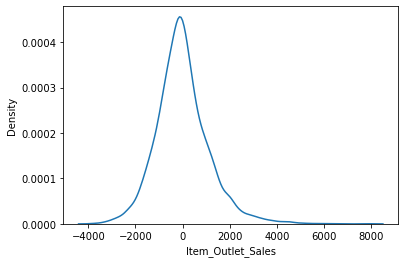

In [73]:
sns.kdeplot(residual)

<AxesSubplot:ylabel='Item_Outlet_Sales'>

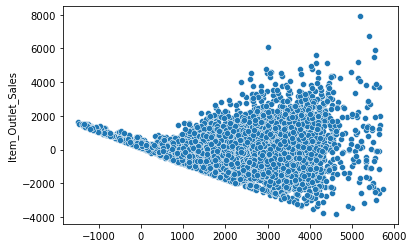

In [74]:
sns.scatterplot(x = train_predict, y = residual)

<AxesSubplot:ylabel='Item_Outlet_Sales'>

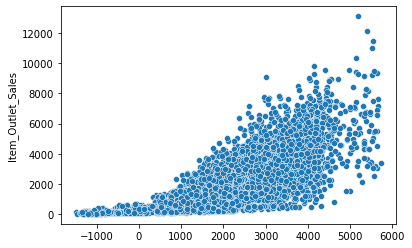

In [75]:
sns.scatterplot(x = train_predict,y= train_y )